In [1]:
import pathlib

CELIAI = pathlib.Path("/celiAI")
SPECTROGRAMS = CELIAI / "data" / "spectrograms"

In [2]:
from fastai.vision import *

In [13]:
np.random.seed(42)

data = ImageDataBunch.from_folder(SPECTROGRAMS, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [14]:
data.classes

['merengue', 'salsa']

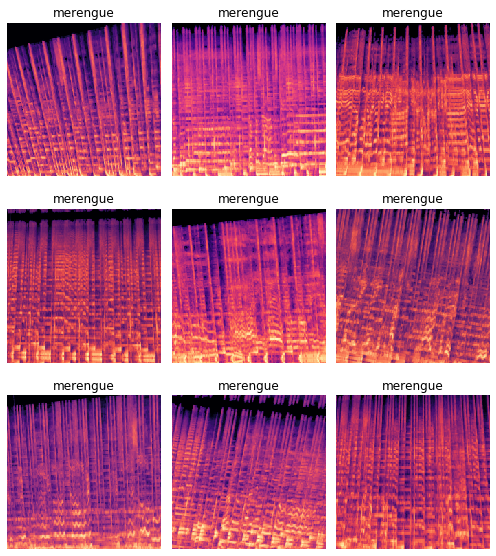

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['merengue', 'salsa'], 2, 1600, 400)

In [18]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.802561,0.263647,0.042500,03:24


KeyboardInterrupt: 